# TYPE OF DİA

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [79]:
df = pd.read_csv("type of the Diamond new.csv")

In [80]:
df.head()

,cut,color,clarity,carat,depth,table,price,x (Premium),z (Very Good),y (Good)
0,Fair,E,VS2,0.22,65.1,61.0,337,3.87,2.49,3.78
1,Fair,E,SI2,0.86,55.1,69.0,2757,6.45,3.52,6.33
2,Fair,F,SI2,0.96,66.3,62.0,2759,6.27,4.07,5.95
3,Fair,F,VS2,0.70,64.5,57.0,2762,5.57,3.58,5.53
4,Fair,F,VS2,0.70,65.3,55.0,2762,5.63,3.66,5.58


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   cut            53940 non-null  object 
 1   color          53940 non-null  object 
 2   clarity        53940 non-null  object 
 3   carat          53940 non-null  float64
 4   depth          53940 non-null  float64
 5   table          53940 non-null  float64
 6   price          53940 non-null  int64  
 7   x (Premium)    53940 non-null  float64
 8   z (Very Good)  53940 non-null  float64
 9   y (Good)       53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [82]:
df.isna().sum()

cut              0
color            0
clarity          0
carat            0
depth            0
table            0
price            0
x (Premium)      0
z (Very Good)    0
y (Good)         0
dtype: int64

In [83]:
df.shape

(53940, 10)

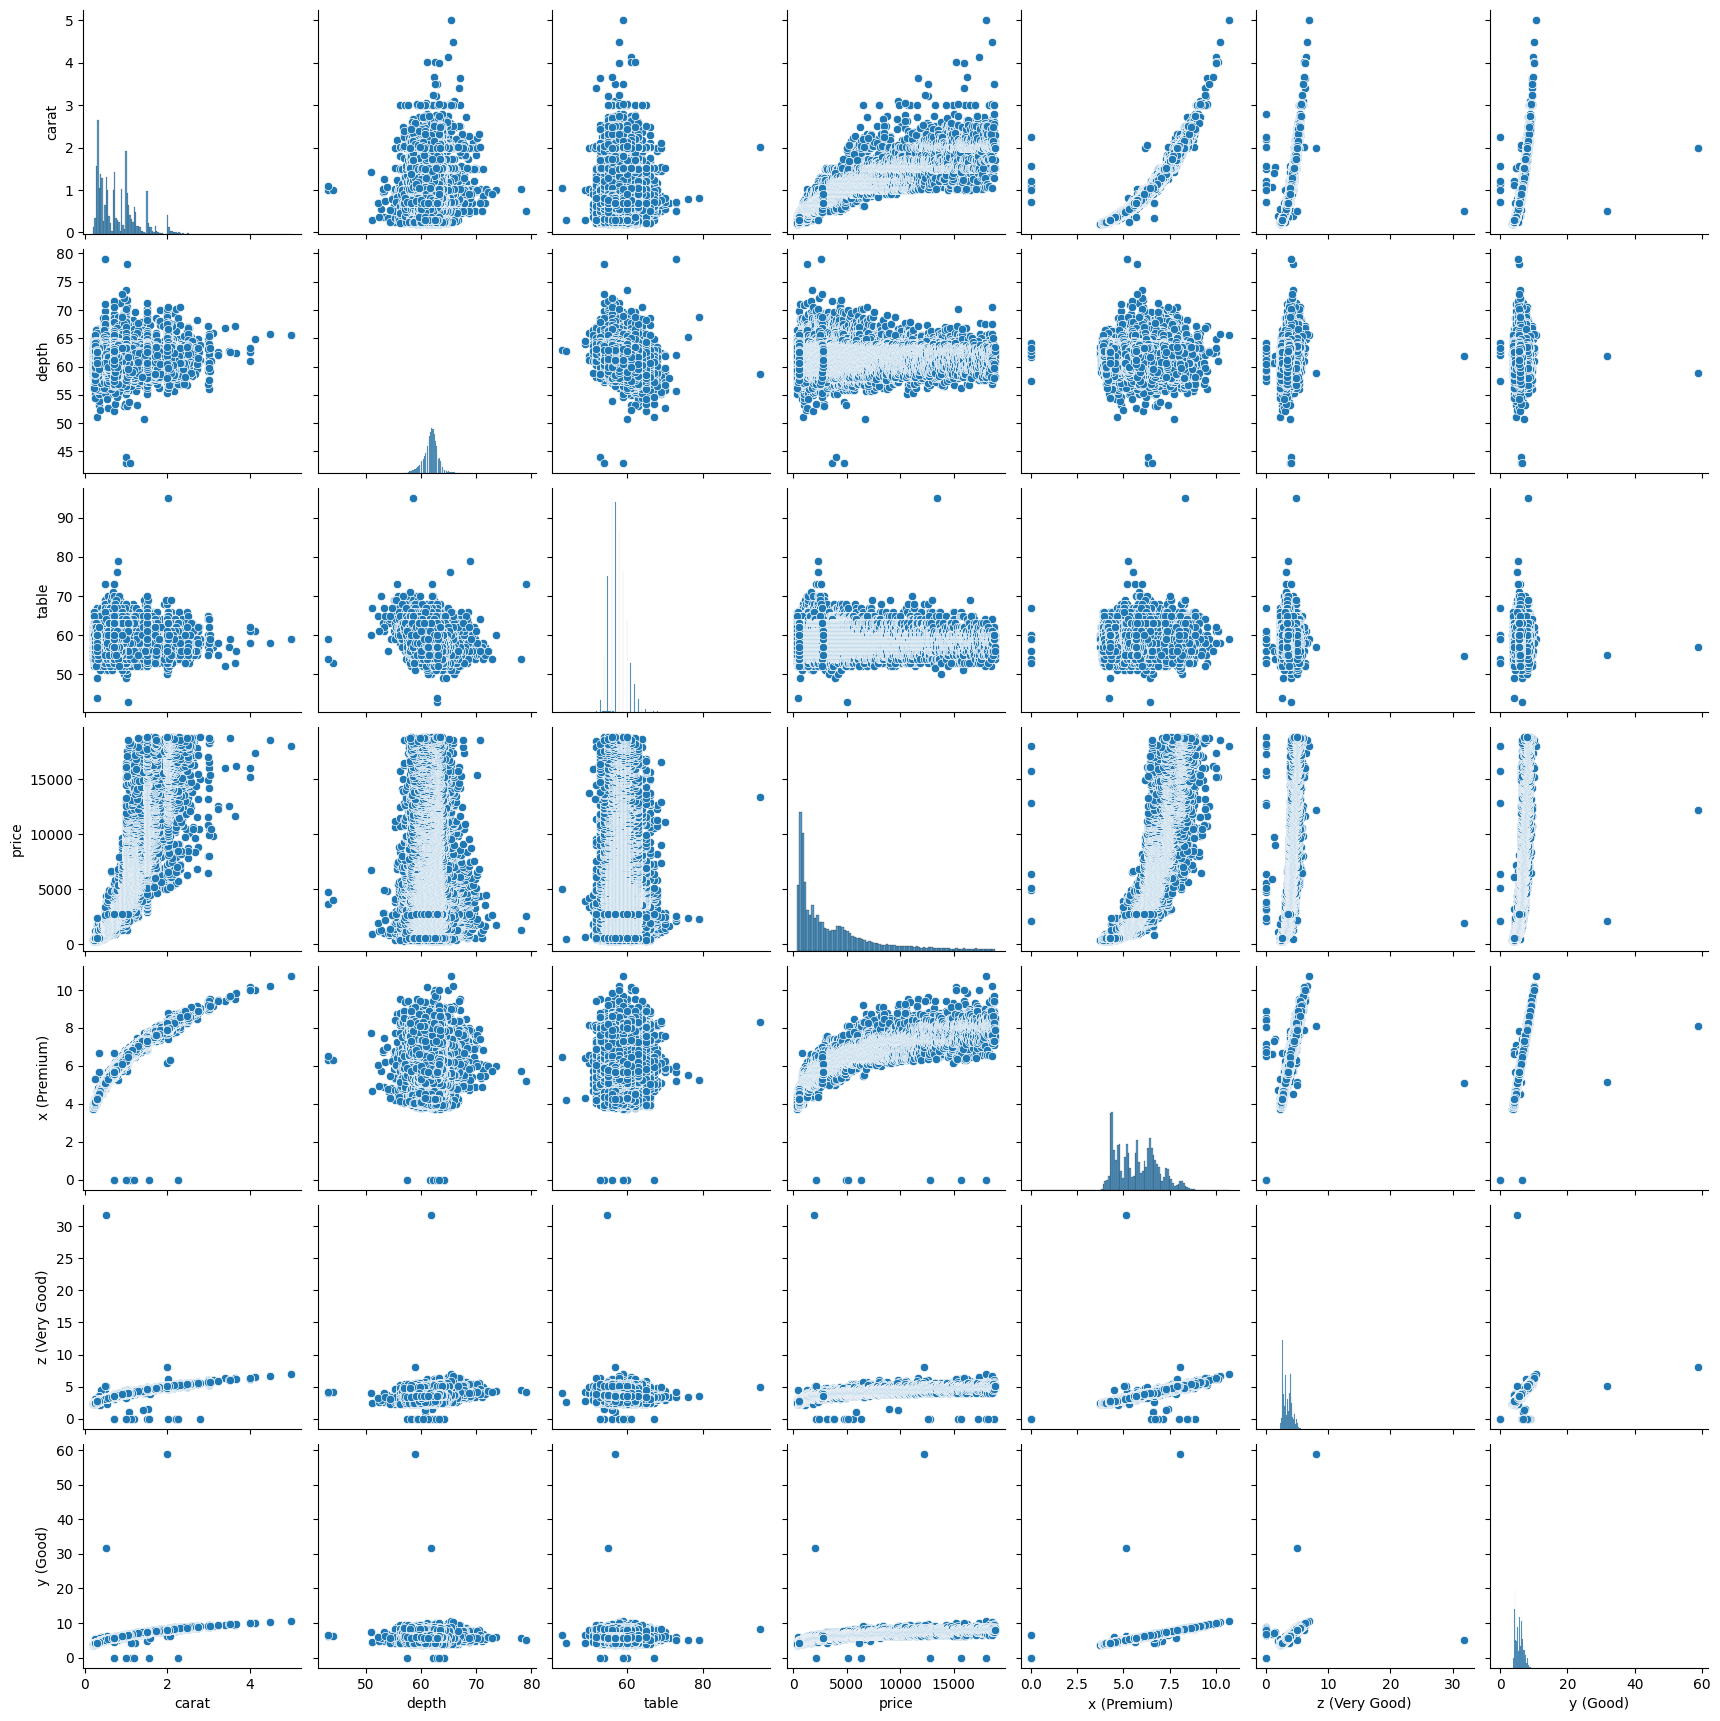

In [84]:
sns.pairplot(df)

<Axes: >

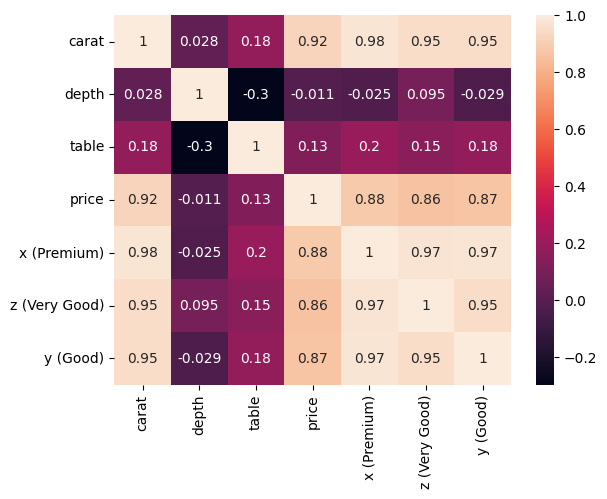

In [85]:
sns.heatmap(df.corr(numeric_only=True) , annot=True)

# SVM

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# Min Max : Min-Max Scaler, verilerinizi belirli bir aralığa 
# (genellikle 0 ile 1 arasında) dönüştürmek için kullanılan bir normalizasyon yöntemidir.
#  Bu, özellikle makine öğrenmesi modellerinde önemli bir adımdır, çünkü birçok model, özelliklerin belirli bir aralıkta olmasını
#  bekler ve çok büyük ya da çok küçük değerler, modelin doğruluğunu olumsuz etkileyebilir. 

df[['x (Premium)', 'z (Very Good)', 'y (Good)']] = scaler.fit_transform(df[['x (Premium)', 'z (Very Good)', 'y (Good)']])


In [87]:
x = pd.get_dummies(df.drop(columns=['x (Premium)', 'z (Very Good)', 'y (Good)']))
y= df[['x (Premium)', 'z (Very Good)', 'y (Good)']]

* TRAİN TEST SPLİT 

In [88]:
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler

In [89]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=9)

* VE STANDART SCALER

In [90]:
scaler = StandardScaler()
scaler_X_train = scaler.fit_transform(X_train)
scaler_X_test = scaler.transform(X_test)

* SVC

In [91]:
from sklearn.svm import SVC

In [92]:
svc = SVC()

In [ ]:
# x (Premium) için sınıflandırılabilir hale getirmemiz lazım .Aksi halde işlem yapamıyoruz
y_train['x (Premium)'] = (y_train['x (Premium)'] > 0).astype(int)
y_test['x (Premium)'] = (y_test['x (Premium)'] > 0).astype(int)
y_train['z (Very Good)'] = (y_train['z (Very Good)'] > 0).astype(int)
y_test['z (Very Good)'] = (y_test['z (Very Good)'] > 0).astype(int)
y_train['y (Good)'] = (y_train['y (Good)'] > 0).astype(int)
y_test['y (Good)'] = (y_test['y (Good)'] > 0).astype(int)

In [109]:
# x (Premium) için model
svc_premium = SVC()
svc_premium.fit(scaler_X_train, y_train['x (Premium)'])

SVC()

In [94]:
# z (Very Good) için model
svc_very_good = SVC()
svc_very_good.fit(scaler_X_train, y_train['z (Very Good)'])

SVC()

In [95]:
# y (Good) için model
svc_good = SVC()
svc_good.fit(scaler_X_train, y_train['y (Good)'])


SVC()

In [ ]:
# Hepsi için ayrı ayrı predict işlemi yapıyoruz.
pred_premium = svc_premium.predict(scaler_X_test)
pred_very_good = svc_very_good.predict(scaler_X_test)
pred_good = svc_good.predict(scaler_X_test)

* METRİKLER

In [102]:
from sklearn.metrics import classification_report 

In [129]:
# Ayrı Ayrı hata çözümlemelerine baktık
print("x (Premium) için sınıflandırma raporu:")
print(classification_report(y_test['x (Premium)'], pred_premium))

print("z (Very Good) için sınıflandırma raporu:")
print(classification_report(y_test['z (Very Good)'], pred_very_good))

print("y (Good) için sınıflandırma raporu:")
print(classification_report(y_test['y (Good)'], pred_good));

x (Premium) için sınıflandırma raporu:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2386
           1       0.56      1.00      0.72      3008

    accuracy                           0.56      5394
   macro avg       0.28      0.50      0.36      5394
weighted avg       0.31      0.56      0.40      5394

z (Very Good) için sınıflandırma raporu:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00    5394.0
           1       0.00      0.00      0.00       0.0

    accuracy                           0.00    5394.0
   macro avg       0.00      0.00      0.00    5394.0
weighted avg       0.00      0.00      0.00    5394.0

y (Good) için sınıflandırma raporu:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00    5394.0
           1       0.00      0.00      0.00       0.0

    accuracy                           0.00    5394.0
   macro avg

C:\Users\hdgn5\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hdgn5\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hdgn5\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classificati

# EĞER YUKARIDAKİ GİBİ UĞRAŞMAK İSTEMEZSENİZ

In [ ]:
from sklearn.svm import SVC
from sklearn.multioutput import MultiOutputClassifier


* MultiOutputClassifier, SVM modelini her hedef değişken için ayrı ayrı eğitir ve tahmin yapar.

* Bütün bu kolaylıklar sonucunda işlem karşamasından kurtulmuş olursunuz

'''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''

* MİN MAX SCALER

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# Min Max : Min-Max Scaler, verilerinizi belirli bir aralığa 
# (genellikle 0 ile 1 arasında) dönüştürmek için kullanılan bir normalizasyon yöntemidir.

df[['x (Premium)', 'z (Very Good)', 'y (Good)']] = scaler.fit_transform(df[['x (Premium)', 'z (Very Good)', 'y (Good)']])


* Değerleri saysısal yapmak ve düzenlemek

In [119]:
x = pd.get_dummies(df.drop(columns=['x (Premium)', 'z (Very Good)', 'y (Good)']))
y= df[['x (Premium)', 'z (Very Good)', 'y (Good)']]

In [ ]:
# Y değerlerini binary hale getirme (0 ve 1 yapmak)
# y_train içindeki değerler 0-1 gibi kategorik (binary) değerler olmalı
y_train = (y_train > 0.5).astype(int)
y_test = (y_test > 0.5).astype(int)


* Standart Scaler ve Train Test Split

In [120]:
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler

In [121]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=9)

In [122]:
scaler = StandardScaler()
scaler_X_train = scaler.fit_transform(X_train)
scaler_X_test = scaler.transform(X_test)

* SVC model oluşturma

1. MultiOutputClassifier Nedir?
MultiOutputClassifier, birden fazla çıkışı (etiketi) aynı anda tahmin edebilen bir model oluşturmanı sağlar. Normalde SVC gibi sınıflandırıcılar tek bir hedef değişken (yani tek bir sütun) üzerinde çalışır. Ancak elimizde üç farklı hedef değişken (x (Premium), z (Very Good), y (Good)) var.

MultiOutputClassifier, bu işi şu şekilde yapar:

Her hedef değişken için ayrı ayrı bir SVC modeli oluşturur.
Bu modelleri aynı anda eğitir ve tahmin yaparken hepsini kullanır.
Sonuç olarak, modelimiz birden fazla hedef değişkeni aynı anda tahmin edebilir.


2. n_jobs=-1 Ne İşe Yarar?

n_jobs parametresi, modelin kaç işlemci çekirdeğini (CPU core) kullanacağını belirler.
n_jobs=-1 dersen tüm işlemci çekirdeklerini kullanır, yani modeli hızlandırır.
Eğer belirli bir çekirdek sayısı kullanmak istersen, örneğin n_jobs=2 dersen, model sadece 2 çekirdeği kullanır.

In [126]:
svc = SVC()
multi_output_model = MultiOutputClassifier(svc, n_jobs=-1)

# Modeli eğitim verisi ile eğitme
multi_output_model.fit(scaler_X_train, y_train)

# Model tahminleri
pred = multi_output_model.predict(scaler_X_test)

* Neden Ayrı Ayrı Yazdık? (classification_report(y_test['x (Premium)'], pred[:, 0]) gibi)

1️⃣ pred[:, 0] Ne Anlama Geliyor?
pred[:, 0] → Birinci hedef değişken (x (Premium)) için tahminler
pred[:, 1] → İkinci hedef değişken (z (Very Good)) için tahminler
pred[:, 2] → Üçüncü hedef değişken (y (Good)) için tahminler
pred çok boyutlu bir matris olduğu için, [satır, sütun] mantığıyla ilk sütunu ([:, 0]) seçerek sadece x (Premium) tahminlerini alıyoruz.

2️⃣ Neden Tek Tek Yazdık?
classification_report() fonksiyonu tek bir hedef değişken (yani tek bir sütun) için çalışır.
Eğer tüm hedefleri bir anda vermeye çalışırsak hata alırız.
Bu yüzden her bir hedef değişkenin gerçek değerleri (y_test[...]) ile model tahminlerini (pred[...]) tek tek kıyaslıyoruz.

In [128]:
# Sınıflandırma raporunu yazdırma
print("x (Premium) için sınıflandırma raporu:")
print(classification_report(y_test['x (Premium)'], pred[:, 0]))

print("z (Very Good) için sınıflandırma raporu:")
print(classification_report(y_test['z (Very Good)'], pred[:, 1]))

print("y (Good) için sınıflandırma raporu:")
print(classification_report(y_test['y (Good)'], pred[:, 2]))

# FARKLI BİR YÖNTEM

'''
labels = ['x (Premium)', 'z (Very Good)', 'y (Good)']

for i, label in enumerate(labels):
    print(f"{label} için sınıflandırma raporu:")
    print(classification_report(y_test[label], pred[:, i]))

'''

x (Premium) için sınıflandırma raporu:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      2386
           1       1.00      0.97      0.98      3008

    accuracy                           0.98      5394
   macro avg       0.98      0.98      0.98      5394
weighted avg       0.98      0.98      0.98      5394

z (Very Good) için sınıflandırma raporu:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5394

    accuracy                           1.00      5394
   macro avg       1.00      1.00      1.00      5394
weighted avg       1.00      1.00      1.00      5394

y (Good) için sınıflandırma raporu:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5394

    accuracy                           1.00      5394
   macro avg       1.00      1.00      1.00      5394
weighted avg       1.00      1.00      1.00      5394



'\nlabels = [\'x (Premium)\', \'z (Very Good)\', \'y (Good)\']\n\nfor i, label in enumerate(labels):\n    print(f"{label} için sınıflandırma raporu:")\n    print(classification_report(y_test[label], pred[:, i]))\n\n'

C:\Users\hdgn5\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
C:\Users\hdgn5\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


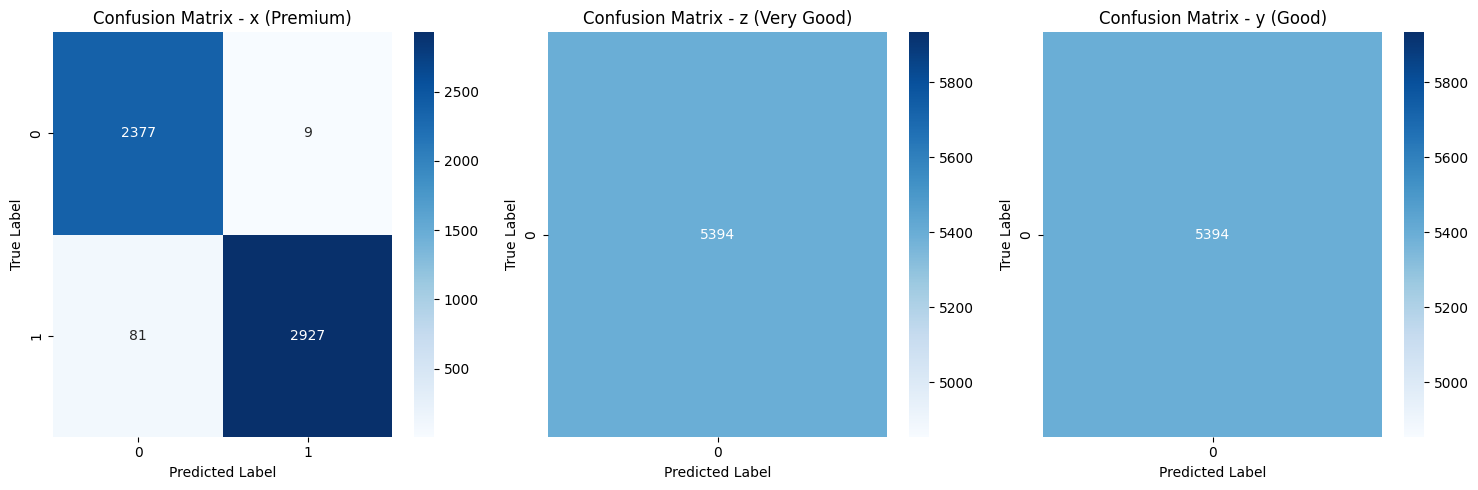

In [130]:
from sklearn.metrics import confusion_matrix
labels = ['x (Premium)', 'z (Very Good)', 'y (Good)']
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Her hedef değişken için karışıklık matrisini çiz
for i, label in enumerate(labels):
    cm = confusion_matrix(y_test[label], pred[:, i])  # Karışıklık Matrisi
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", ax=axes[i])
    axes[i].set_title(f"Confusion Matrix - {label}")
    axes[i].set_xlabel("Predicted Label")
    axes[i].set_ylabel("True Label")

plt.tight_layout()
plt.show()


C:\Users\hdgn5\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\hdgn5\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


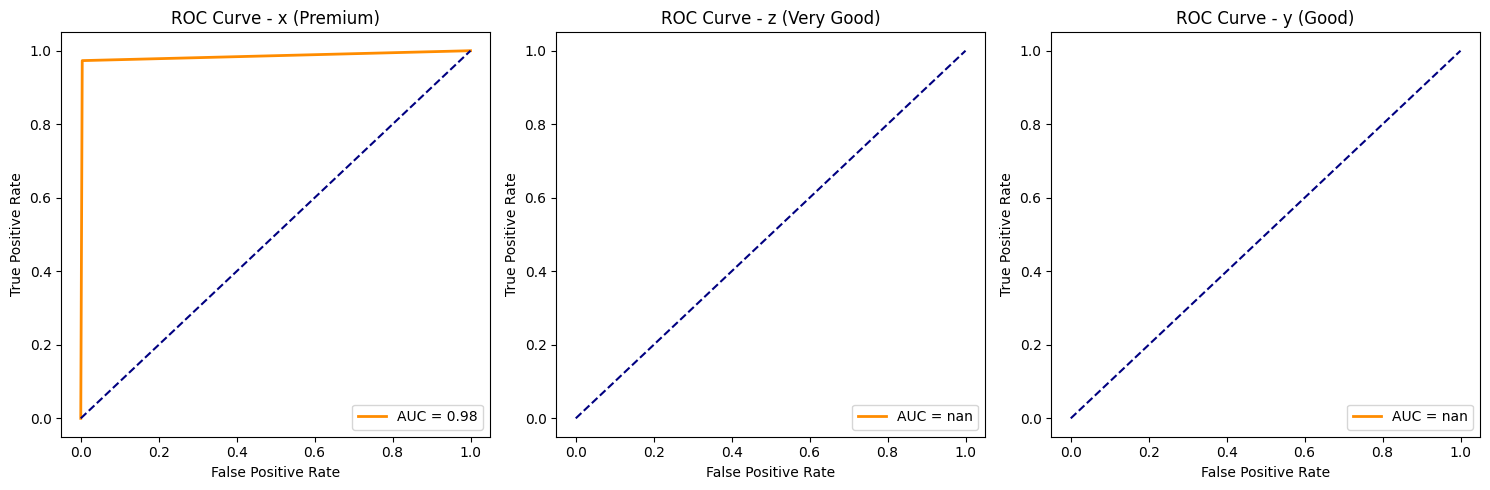

In [131]:
from sklearn.metrics import roc_curve, auc

# Hedef değişkenler
labels = ['x (Premium)', 'z (Very Good)', 'y (Good)']

# Grafik çizimi için boş figür oluştur
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Her hedef değişken için ROC eğrisini çiz
for i, label in enumerate(labels):
    fpr, tpr, _ = roc_curve(y_test[label], pred[:, i])  # FPR ve TPR hesapla
    roc_auc = auc(fpr, tpr)  # AUC değeri hesapla
    axes[i].plot(fpr, tpr, color='darkorange', lw=2, label=f"AUC = {roc_auc:.2f}")
    axes[i].plot([0, 1], [0, 1], color='navy', linestyle='--')  # Random model çizgisi
    axes[i].set_title(f"ROC Curve - {label}")
    axes[i].set_xlabel("False Positive Rate")
    axes[i].set_ylabel("True Positive Rate")
    axes[i].legend(loc="lower right")

plt.tight_layout()
plt.show()
